In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
#classificators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [7]:
scaler = StandardScaler()
label = LabelEncoder()

In [11]:
location='RUASVII_DATASET.xlsx'
df=pd.read_excel(location)

In [12]:
#заменяем пропуски на нули
torep=['Customer', 'Age', 'COUNT_of_AccountN', 'SUM_BALANCE', 'IS_CARD',
       'COUNT_CARD', 'IS_CC', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'IS_DC',
       'COUNT_DC_Main', 'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE',
       'Count_CARLOAN','Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN', 'COUNT_TD', 'SUM_TD',
       'SESS_1M_COUNT', 'SESS_3M_COUNT', 'SESS_12M_COUNT',
       'A12', 'A6', 'A3', 'A1', 'Active_months', 'COUNT_12', 'SumR_12',
       'COUNT_6', 'SumR_6', 'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1', 
       'Active_months_RC', 'COUNT_12RC',
       'SumR_12RC', 'COUNT_3RC', 'SumR_3RC', 'COUNT_1RC', 'SumR_1RC', 'A12ATM', 'A3ATM',
       'A1ATM', 'Active_months_ATM', 'COUNT_12ATM', 'SumR_12ATM', 'COUNT_3ATM',
       'SumR_3ATM', 'COUNT_1ATM', 'SumR_1ATM', 'A12POS', 'A3POS', 'A1POS',
       'Active_months_POS', 'COUNT_12POS', 'SumR_12POS', 'COUNT_3POS',
       'SumR_3POS', 'COUNT_1POS', 'SumR_1POS', 'A12Br', 'A3Br', 'A1Br',
       'Active_months_Br', 'COUNT_12Br', 'SumR_12Br', 'COUNT_3Br','SumR_3Br', 'COUNT_1Br', 'SumR_1Br', 'CountTr', 'SumTr',
       'CountTr_Vyvod_', 'SumTrVyvod', 'Part_CountTrVyvod', 'Part_SumTrVyvod',
       'IS_RCAS','IS_CA', 'IS_B1000', 'IS_TD', 'IS_CREDIT', 'IS_SMS_ALERT', 'IS_PIN',
       '#_MWS_Оплата услуг', '#_RC_Оплата услуг',
       '#_RC_перевод на карту другого ба', '#_MWS_перевод на чужую карту Рай',
       '#_RC_Рублевые переводы', '#_MWS_перевод на карту другого б',
       '#_MWS_Пополнение депозита', '#_MWS_Частичное снятие депозита',
       '#_MWS_Внутренние Переводы/Конвер', '#_RC_перевод на чужую карту Райф','#_RC_перевод средств между своим', '#_MWS_Перевод с карты на карту',
       '#_MWS_Рублевые переводы', '#_RC_Перевод с карты на карту',
       '#_RC_Внутренние Переводы/Конверт', '#_MWS_Добавление Push ID',
       '#_RC_Перевод с карты другого бан', '#_MWS_Открытие депозита',
       '#_RC_Платежи в бюджет (РФ)', '#_RC_перевод с зп карты на карту',
       '#_MWS_Перевод с карты другого ба', '#_RC_Заявление на ЧДП кредита Ум',
       '#_RC_Пополнение депозита', '#_MWS_перевод средств между свои',
       '#_RC_Создание нового счета', '#_MWS_Заявление на ЧДП кредита У',
       '#_MWS_Заявление на полное досроч', '#_MWS_Изменение телефона для SMS',
       '#_RC_Частичное снятие депозита', '#_RC_Открытие депозита',
       '#_RC_Валютные переводы за рубеж', '#_MWS_Создание нового счета',
       '#_RC_Изменение телефона для SMS', '#_RC_Заявление на полное досрочн',
       '#_MBG_Оплата услуг', '#_RC_Изменение телефона для СМС-',
       '#_RC_Изменение контактного телеф', '#_MWS_Платежи в бюджет (РФ)',
       '#_RC_Валютные переводы РФ', '#_RCP_Перевод с карты на карту',
       '#_MWS_Оплата паев', '#_RC_Подтверждение входа однораз',
       '#_RC_Оплата паев', '#_RC_Изменение параметров автопл',
       '#_RCP_Рублевые переводы', '#_RC_Отключение автоплатежа',
       '#_RCP_Открытие депозита', '#_RCP_Оплата услуг',
       '#_RCP_Внутренние Переводы/Конвер', '#_RCP_Частичное снятие депозита','#_RCP_Платежи в бюджет (РФ)', '#_RCP_Валютные переводы за рубеж',
       '#_RCP_Пополнение депозита', '#_RC_Подключение автоплатежа',
       '#_RC_Добавление Push ID', 'S_MWS_Оплата услуг', 'S_RC_Оплата услуг',
       'S_RC_перевод на карту другого ба', 'S_MWS_перевод на чужую карту Рай',
       'S_RC_Рублевые переводы', 'S_MWS_перевод на карту другого б',
       'S_MWS_Пополнение депозита', 'S_MWS_Частичное снятие депозита',
       'S_MWS_Внутренние Переводы/Конвер', 'S_RC_перевод на чужую карту Райф',
       'S_RC_перевод средств между своим', 'S_MWS_Перевод с карты на карту',
       'S_MWS_Рублевые переводы', 'S_RC_Перевод с карты на карту',
       'S_RC_Внутренние Переводы/Конверт', 'S_MWS_Добавление Push ID',
       'S_RC_Перевод с карты другого бан', 'S_MWS_Открытие депозита',
       'S_RC_Платежи в бюджет (РФ)', 'S_RC_перевод с зп карты на карту',
       'S_MWS_Перевод с карты другого ба', 'S_RC_Заявление на ЧДП кредита Ум',
       'S_RC_Пополнение депозита', 'S_MWS_перевод средств между свои',
       'S_RC_Создание нового счета', 'S_MWS_Заявление на ЧДП кредита У',
       'S_MWS_Заявление на полное досроч', 'S_MWS_Изменение телефона для SMS',
       'S_RC_Частичное снятие депозита', 'S_RC_Открытие депозита',
       'S_RC_Валютные переводы за рубеж', 'S_MWS_Создание нового счета',
       'S_RC_Изменение телефона для SMS', 'S_RC_Заявление на полное досрочн',
       'S_MBG_Оплата услуг','S_RC_Изменение телефона для СМС-', 'S_RC_Изменение контактного телеф',
       'S_MWS_Платежи в бюджет (РФ)', 'S_RC_Валютные переводы РФ',
       'S_RCP_Перевод с карты на карту', 'S_MWS_Оплата паев',
       'S_RC_Подтверждение входа однораз', 'S_RC_Оплата паев',
       'S_RC_Изменение параметров автопл', 'S_RCP_Рублевые переводы',
       'S_RC_Отключение автоплатежа', 'S_RCP_Открытие депозита',
       'S_RCP_Оплата услуг', 'S_RCP_Внутренние Переводы/Конвер',
       'S_RCP_Частичное снятие депозита', 'S_RCP_Платежи в бюджет (РФ)',
       'S_RCP_Валютные переводы за рубеж', 'S_RCP_Пополнение депозита',
       'S_RC_Подключение автоплатежа', 'S_RC_Добавление Push ID', 'SUM_ALL',
       '/_MWS_Оплата услуг', '/_RC_Оплата услуг',
       '/_RC_перевод на карту другого ба', '/_MWS_перевод на чужую карту Рай',
       '/_RC_Рублевые переводы', '/_MWS_перевод на карту другого б',
       '/_MWS_Пополнение депозита', '/_MWS_Частичное снятие депозита',
       '/_MWS_Внутренние Переводы/Конвер', '/_RC_перевод на чужую карту Райф',
       '/_RC_перевод средств между своим', '/_MWS_Перевод с карты на карту',
       '/_MWS_Рублевые переводы', '/_RC_Перевод с карты на карту',
       '/_RC_Внутренние Переводы/Конверт', '/_MWS_Добавление Push ID',
       '/_RC_Перевод с карты другого бан', '/_MWS_Открытие депозита',
       '/_RC_Платежи в бюджет (РФ)', '/_RC_перевод с зп карты на карту',
       '/_MWS_Перевод с карты другого ба', '/_RC_Заявление на ЧДП кредита Ум',
       '/_RC_Пополнение депозита', '/_MWS_перевод средств между свои',
       '/_RC_Создание нового счета', '/_MWS_Заявление на ЧДП кредита У',
       '/_MWS_Заявление на полное досроч', '/_MWS_Изменение телефона для SMS',
       '/_RC_Частичное снятие депозита', '/_RC_Открытие депозита',
       '/_RC_Валютные переводы за рубеж', '/_MWS_Создание нового счета',
       '/_RC_Изменение телефона для SMS', '/_RC_Заявление на полное досрочн',
       '/_MBG_Оплата услуг', '/_RC_Изменение телефона для СМС-',
       '/_RC_Изменение контактного телеф', '/_MWS_Платежи в бюджет (РФ)',
       '/_RC_Валютные переводы РФ', '/_RCP_Перевод с карты на карту',
       '/_MWS_Оплата паев', '/_RC_Подтверждение входа однораз',
       '/_RC_Оплата паев', '/_RC_Изменение параметров автопл',
       '/_RCP_Рублевые переводы', '/_RC_Отключение автоплатежа',
       '/_RCP_Открытие депозита', '/_RCP_Оплата услуг',
       '/_RCP_Внутренние Переводы/Конвер', '/_RCP_Частичное снятие депозита',
       '/_RCP_Платежи в бюджет (РФ)', '/_RCP_Валютные переводы за рубеж',
       '/_RCP_Пополнение депозита', '/_RC_Подключение автоплатежа',
       '/_RC_Добавление Push ID', 'TMP_cnt_this_month',
       'TMP_count_creation_dates', 'TMP_count', 'TMP_count_type',
       'TMP_delta_MinMax_days',
       'TMP_delta_MaxAv_days', 'COUNT_Comp_Mob', 'COUNT_of_Browser',
       'CNT_send_cards', 'CNT_recieve_banks', 'CNT_distinct_sums',
       'MAX_of_OP_IS_MTC', 'MAX_of_OP_IS_Beeline', 'MAX_of_OP_IS_Megafon',
       'MAX_of_OP_IS_Tele2', 'MAX_of_OP_IS_other','Month','Date']
for q in torep:
    df[q]=df[q].fillna(0) 

In [13]:
cltype=pd.get_dummies(df.Client_Type) 
df = pd.concat([df, cltype], axis=1)

In [14]:
#создаем новые фичи по датам
df['DIF_1-2Trans']=df['Second_TrRC']-df['First_TrRC']
df['DIF_1-2Trans']=df['DIF_1-2Trans'].fillna(df['DIF_1-2Trans'].mean())
df['dif_A']=df['DATE_LAST_SESSION'] - df['Last_A_RC']
df['dif_A']=df['dif_A'].fillna(df['dif_A'].mean())
df['years_acc']=df['DATE_LAST_SESSION'] - df['First_Account']
df['years_acc']=df['years_acc'].fillna(df['years_acc'].mean())
df['SESS_2M_COUNT']=df['SESS_3M_COUNT'] - df['SESS_1M_COUNT']

df['DIF_1-2Trans']=df['DIF_1-2Trans'].apply(lambda x: x.days)
df['dif_A']=df['dif_A'].apply(lambda x: x.days)
df['years_acc']=df['years_acc'].apply(lambda x: x.days)
     
Y=df.Y
to_drop=['Client_Type','IS_CARD', 'IS_DC', 'IS_CC', 'Customer', 'Y', 'Last_A', 'Last_A_RC','First_Account','DATE_LAST_SESSION','First_TrRC','Second_TrRC','min_creation_date','max_creation_date']
df=df.drop(to_drop,axis=1)  

In [16]:
df.BUNDLECODE=df.BUNDLECODE.fillna('NONE')  
df.BUNDLECODE=label.fit_transform(df.BUNDLECODE)
df.Married=df.Married.fillna('nan')
df.Married=label.fit_transform(df.Married)
df.Gender=df.Gender.fillna('nan')
df.Gender = label.fit_transform(df.Gender)
df.segment=df.segment.fillna('NONE')
df.segment=label.fit_transform(df.segment)
df.Вывод=df.Вывод.fillna('no info')
df.Вывод=label.fit_transform(df.Вывод)
df.Hub_HB=df.Hub_HB.fillna('nan')
df.Hub_HB=label.fit_transform(df.Hub_HB)
df.AgeGroup=df.AgeGroup.fillna('nan')
df.AgeGroup=label.fit_transform(df.AgeGroup)
df.SMS_ALERTING=df.SMS_ALERTING.fillna('nan')
df.SMS_ALERTING = label.fit_transform(df.SMS_ALERTING)
df.Client_Category=df.Client_Category.fillna('nan')
#df.Client_Type=df.Client_Type.fillna('nan')
df.Client_Category=label.fit_transform(df.Client_Category)
#df.Client_Type=label.fit_transform(df.Client_Type)
df.Category=df.Category.fillna('nan')   
df.Category=label.fit_transform(df.Category)
df.HomeBranch=df.HomeBranch.fillna('nan')   
df.HomeBranch=label.fit_transform(df.HomeBranch)
df.Branch_HB=df.Branch_HB.fillna('nan')   
df.Branch_HB=label.fit_transform(df.Branch_HB)
df.ClientBranch=df.ClientBranch.fillna('nan')   
df.ClientBranch=label.fit_transform(df.ClientBranch)
df.Branch_C=df.Branch_C.fillna('nan')   
df.Branch_C=label.fit_transform(df.Branch_C)
df.Hub_C=df.Hub_C.fillna('nan')   
df.Hub_C=label.fit_transform(df.Hub_C)
df.Вывод=df.Вывод.fillna('nan')   
df.Вывод=label.fit_transform(df.Вывод)
df.Branch_BR=df.Branch_BR.fillna('nan')   
df.Branch_BR=label.fit_transform(df.Branch_BR)
df.HUB_BR=df.HUB_BR.fillna('nan')   
df.HUB_BR=label.fit_transform(df.HUB_BR)

In [17]:
df2=df.copy()
to_drop=['Month', 'Category', 'Client_Category', 'segment', 'Age', 'AgeGroup',
       'Gender', 'Married', 'BUNDLECODE', 'HomeBranch', 'Branch_HB', 'Hub_HB',
       'ClientBranch', 'Branch_C', 'Hub_C', 'COUNT_of_AccountN', 'SUM_BALANCE',
       'COUNT_CARD', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'COUNT_DC_Main',
       'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE', 'Count_CARLOAN',
       'Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN', 'COUNT_TD', 'SUM_TD',
       'A12', 'A6', 'A3',
       'A1', 'Active_months', 'COUNT_12', 'SumR_12', 'COUNT_6', 'SumR_6',
       'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1',       
      'A12ATM', 'A3ATM', 'A1ATM', 'Active_months_ATM',
       'COUNT_12ATM', 'SumR_12ATM', 'COUNT_3ATM','SumR_3ATM', 'COUNT_1ATM', 'SumR_1ATM', 'A12POS', 'A3POS', 'A1POS',
       'Active_months_POS', 'COUNT_12POS', 'SumR_12POS', 'COUNT_3POS',
       'SumR_3POS', 'COUNT_1POS', 'SumR_1POS', 'A12Br', 'A3Br', 'A1Br',
       'Active_months_Br', 'COUNT_12Br', 'SumR_12Br', 'COUNT_3Br', 'SumR_3Br',
       'COUNT_1Br', 'SumR_1Br', 'CountTr', 'SumTr', 'CountTr_Vyvod_',
       'SumTrVyvod', 'Part_CountTrVyvod', 'Part_SumTrVyvod', 'Вывод',
       'SMS_ALERTING', 'IS_RCAS', 'Branch_BR', 'HUB_BR', 'IS_CA', 'IS_B1000',
       'IS_TD', 'IS_CREDIT', 'IS_SMS_ALERT', 'IS_PIN', 
       'S_MWS_Оплата услуг', 'S_RC_Оплата услуг',
       'S_RC_перевод на карту другого ба', 'S_MWS_перевод на чужую карту Рай',
       'S_RC_Рублевые переводы', 'S_MWS_перевод на карту другого б',
       'S_MWS_Пополнение депозита', 'S_MWS_Частичное снятие депозита',
       'S_MWS_Внутренние Переводы/Конвер', 'S_RC_перевод на чужую карту Райф',
       'S_RC_перевод средств между своим', 'S_MWS_Перевод с карты на карту',
       'S_MWS_Рублевые переводы', 'S_RC_Перевод с карты на карту',
       'S_RC_Внутренние Переводы/Конверт', 'S_MWS_Добавление Push ID',
       'S_RC_Перевод с карты другого бан', 'S_MWS_Открытие депозита',
       'S_RC_Платежи в бюджет (РФ)', 'S_RC_перевод с зп карты на карту',
       'S_MWS_Перевод с карты другого ба', 'S_RC_Заявление на ЧДП кредита Ум',
       'S_RC_Пополнение депозита', 'S_MWS_перевод средств между свои',
       'S_RC_Создание нового счета', 'S_MWS_Заявление на ЧДП кредита У',
       'S_MWS_Заявление на полное досроч', 'S_MWS_Изменение телефона для SMS',
       'S_RC_Частичное снятие депозита', 'S_RC_Открытие депозита',
       'S_RC_Валютные переводы за рубеж', 'S_MWS_Создание нового счета',
       'S_RC_Изменение телефона для SMS', 'S_RC_Заявление на полное досрочн',
       'S_MBG_Оплата услуг', 'S_RC_Изменение телефона для СМС-',
       'S_RC_Изменение контактного телеф', 'S_MWS_Платежи в бюджет (РФ)',
       'S_RC_Валютные переводы РФ', 'S_RCP_Перевод с карты на карту',
       'S_MWS_Оплата паев', 'S_RC_Подтверждение входа однораз',
       'S_RC_Оплата паев', 'S_RC_Изменение параметров автопл',
       'S_RCP_Рублевые переводы','S_RC_Отключение автоплатежа', 'S_RCP_Открытие депозита',
       'S_RCP_Оплата услуг', 'S_RCP_Внутренние Переводы/Конвер',
       'S_RCP_Частичное снятие депозита', 'S_RCP_Платежи в бюджет (РФ)',
       'S_RCP_Валютные переводы за рубеж', 'S_RCP_Пополнение депозита',
       'S_RC_Подключение автоплатежа', 'S_RC_Добавление Push ID', 'SUM_ALL',
       'Date', 'Employee', 'Payroll', 'Walk-in', 'DIF_1-2Trans', 'dif_A', 'years_acc',
     ]
df=df.drop(to_drop,axis=1)  

In [18]:
X=scaler.fit_transform(df)
X=pd.DataFrame(X)
X.columns=df.columns

In [19]:
Z = linkage(X, method = 'ward')

In [20]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

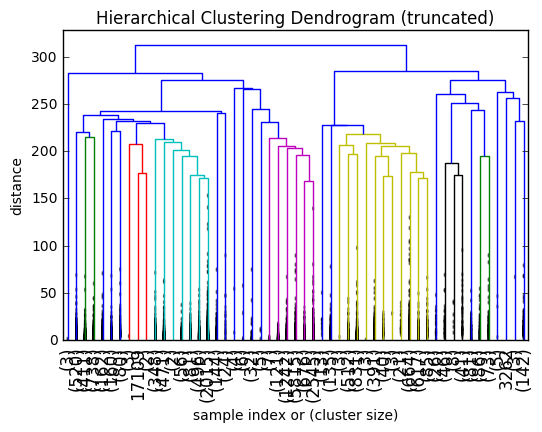

In [41]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=53,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [61]:
h_labels=fcluster(Z, 164 , criterion='distance')

In [24]:
def cluster_labels(X, threshold):
    Z = linkage(X, method='ward')
    h_labels=fcluster(Z, threshold , criterion='distance')
    final=df.copy()
    final['final_labels']=h_labels
    unique_labels=final['final_labels'].value_counts().index.tolist()
    final.final_labels.replace(unique_labels,[i+1 for i in range(len(unique_labels))],inplace=True)
    return final

In [32]:
final=cluster_labels(X, 164)

In [33]:
final=df.copy()
final['final_labels']=h_labels

In [62]:
final['final_labels'].value_counts()

27    5815
29    2545
17    2015
26    1242
34     831
4      738
28     676
40     664
41     617
2      520
33     512
16     496
12     471
3      411
36     391
11     348
5      162
6      160
18     144
52     142
31     135
25     121
48      86
42      85
47      81
15      81
7       80
49      73
14      56
44      46
46      41
37      40
22      32
43      26
19      24
39      21
30      13
45       8
24       7
21       6
50       5
23       5
20       4
51       3
8        3
1        3
38       3
32       3
35       3
13       2
9        2
10       1
53       1
Name: final_labels, dtype: int64

In [35]:
final.head()

,SESS_1M_COUNT,SESS_3M_COUNT,SESS_12M_COUNT,Active_months_RC,COUNT_12RC,SumR_12RC,COUNT_3RC,SumR_3RC,COUNT_1RC,SumR_1RC,...,CNT_send_cards,CNT_recieve_banks,CNT_distinct_sums,MAX_of_OP_IS_MTC,MAX_of_OP_IS_Beeline,MAX_of_OP_IS_Megafon,MAX_of_OP_IS_Tele2,MAX_of_OP_IS_other,SESS_2M_COUNT,final_labels
0,28.0,59.0,132.0,6,15,1.770000e+04,11,4762.000000,3,1300.00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,31.0,16
1,4.0,13.0,74.0,4,9,2.158150e+04,3,3500.000000,1,1500.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,42
2,11.0,70.0,350.0,12,107,1.251326e+06,36,499386.100000,6,24708.00,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,59.0,11
3,9.0,39.0,133.0,12,62,9.565077e+05,17,122873.120000,4,9829.04,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,30.0,5
4,12.0,71.0,131.0,6,31,4.217484e+05,26,392971.318936,7,171858.55,...,1.0,2.0,10.0,1.0,0.0,0.0,0.0,0.0,59.0,41


In [37]:
final.to_csv('final.csv')

In [40]:
writer = ExcelWriter('final.xlsx')
final.to_excel(writer)
writer.save() 

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [44]:
%%time
tsne = TSNE(random_state=1)
tsne_representation = tsne.fit_transform(df)

In [ ]:
final.final_labels

In [58]:
colors = [int(i % 23) for i in final.final_labels]

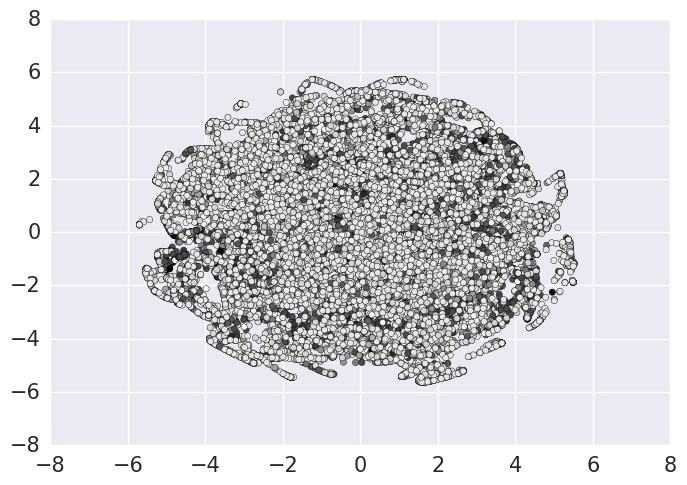

In [65]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],c=colors)